In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import f1_score

from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

from imblearn.metrics import geometric_mean_score
from imblearn.under_sampling import NearMiss 
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer






from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', 100)
from IPython.display import display, Markdown, Latex
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns

palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']
plt.style.use('fivethirtyeight')

In [2]:
best_features_VC = [  'Weekend_binary','Region_dummies_3', 'Region_dummies_1','VisitorType_dummies_New_Visitor', 
        'average_informational_duration_skew_s', 'average_ProductRelated_duration_skew_s',
                      'average_administrative_duration_skew_s',
                      'average_BounceRates/ExitRates_skew_s',
       'season_dummies_Fall', 'PageValues_skew_s']


best_features_GB = ['Browser_dummies_2', 'TrafficType_dummies_8', 'Region_dummies_2', 'season_dummies_Spring', 'OperatingSystems_dummies_2', 'Region_dummies_3', 'Weekend_binary', 'Region_dummies_1',
       'TrafficType_dummies_2', 'average_informational_duration_skew_s', 'average_ProductRelated_duration_skew_s', 'average_administrative_duration_skew_s', 'average_BounceRates/ExitRates_skew_s',
       'season_dummies_Fall', 'PageValues_skew_s']
RF_best_features = ['Region_dummies_1', 'TrafficType_dummies_11',
                    'season_dummies_winter', 'Weekend_binary',
       'VisitorType_dummies_New_Visitor',
                    'VisitorType_dummies_Returning_Visitor',
                    'OperatingSystems_dummies_2', 'TrafficType_dummies_3', 
                    'average_informational_duration_skew_s',
       'OperatingSystems_dummies_3', 'season_dummies_Spring',
                    'TrafficType_dummies_2', 'season_dummies_Fall',
                    'average_ProductRelated_duration_skew_s', 
                    'average_administrative_duration_skew_s',
       'average_BounceRates/ExitRates_skew_s', 'PageValues_skew_s']

SVC_best_features = ['Region_dummies_2', 'Browser_dummies_1',
                     'Browser_dummies_8', 'Browser_dummies_12',
                     'season_dummies_winter', 'Browser_dummies_13', 
                     'season_dummies_summer', 'season_dummies_Fall',
       'OperatingSystems_dummies_7', 'TrafficType_dummies_13', 
                     'TrafficType_dummies_9', 'TrafficType_dummies_14',
                     'TrafficType_dummies_7', 'TrafficType_dummies_6',
                     'TrafficType_dummies_20',
       'TrafficType_dummies_1', 'TrafficType_dummies_4',
                     'TrafficType_dummies_3', 'TrafficType_dummies_5', 
                     'TrafficType_dummies_10', 'TrafficType_dummies_11',
                     'TrafficType_dummies_2',
       'TrafficType_dummies_8', 'TrafficType_dummies_16', 'PageValues_skew_s']

best_features_dt = [  'average_BounceRates/ExitRates_skew_s', 'PageValues_skew_s' ,'VisitorType_dummies_New_Visitor',
 'Weekend_binary']


best_features_spsa = ['average_BounceRates/ExitRates_skew_s', 'season_dummies_Fall',
       'PageValues_skew_s', 'VisitorType_dummies_New_Visitor',
       'TrafficType_dummies_7', 'average_administrative_duration_skew_s']


In [3]:
best_features_VC#.to_html()

['Weekend_binary',
 'Region_dummies_3',
 'Region_dummies_1',
 'VisitorType_dummies_New_Visitor',
 'average_informational_duration_skew_s',
 'average_ProductRelated_duration_skew_s',
 'average_administrative_duration_skew_s',
 'average_BounceRates/ExitRates_skew_s',
 'season_dummies_Fall',
 'PageValues_skew_s']

#### setting up the votingclassifer

In [4]:
clf1 = GradientBoostingClassifier(learning_rate=0.05,n_estimators=1250,max_depth=4, min_samples_split=10,
                                       min_samples_leaf=1, subsample=0.8 , random_state=123,
                                      )

clf2 =BalancedRandomForestClassifier(max_depth =  7 , 
                                  min_samples_split = 6,
                                  min_samples_leaf =1  , 
                                  n_estimators = 1750 ,
                                  random_state=123)

clf3 = SVC(C=1, break_ties=False, cache_size=200,
           class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3,
           gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=123,
           shrinking=True, tol=0.001,
           verbose=False)


eclf = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ("SVC", clf3) ],voting='soft')


In [5]:
# load dataset
import pandas
from scaled_data import *
X,y = clean_data()


###  Setting up the multi evaluation code:

In [6]:
#https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from imblearn.over_sampling import SMOTE


from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 123
# prepare models
models = []
models.append(('LogisticRegression', best_features_spsa,LogisticRegression( max_iter = 2000,random_state=123 , C=1.0, dual=False)))
models.append(('NaiveBayes',best_features_spsa, BernoulliNB()))
models.append(('GradientBoostingClassifier',best_features_GB, GradientBoostingClassifier(learning_rate=0.05,n_estimators=1250,
                    max_depth=4, min_samples_split=10,
                    min_samples_leaf=1, subsample=0.8 , random_state=123)))
models.append(('RandomForestClassifier',RF_best_features, BalancedRandomForestClassifier(max_depth =  7 , 
                    min_samples_split = 6,min_samples_leaf =1  ,
                    n_estimators = 1750 ,random_state=123)))
models.append(('DecisionTreeClassifier',best_features_dt ,DecisionTreeClassifier(max_depth=5,min_samples_split=40)))
models.append(('VotingClassifier',best_features_VC , VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ("SVC", clf3) ],voting='soft')))
models.append(('SVM',SVC_best_features, SVC(C=1, break_ties=False, cache_size=200,
                          class_weight=None, coef0=0.0,decision_function_shape='ovr',
                          degree=3,gamma=1, kernel='linear',max_iter=-1, probability=True
                          , random_state=123,shrinking=True, tol=0.001,verbose=False)))



### Running  cross_val_score with kfold in a for loop and save the results to a csv
##### For each model :
- evaluate each model in turn
- the code saves the f1  & AUC and accuracy  score
- saves the model Hyperparameters
- saves the model  used features 

In [7]:
#https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

# evaluate each model in turn
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, RepeatedKFold

results_accuracy = []
results_f1 = []
results_auc = []
names = []
scoring_accuracy = 'accuracy'
scoring_f1 = 'f1'
scoring_auc =  make_scorer(roc_auc_score)
best_features = []
f1 = []
auc = []
f1_bias = []
auc_bias = []
f1_variance = []
auc_variance = []

accuracy_bias = []
accuracy_variance = []


model_hyper = []
summary = []

data = pd.DataFrame([])
for name, best_feature,model in models:
    X_data = X.copy() #making our X columns

    best_features =[best_feature]

    X_models = X_data[best_feature]
    X_model = X_models.values
#getting the values of our y:
     # target
    y_model = y.values.ravel()



#Splitting data test&train 
    #X_train, X_test, y_train, y_test= train_test_split(X_model, y_model , test_size=0.25, random_state=8)

    

    sm =SMOTE(k_neighbors=4,random_state=123)
    X_bal, y_bal = sm.fit_sample(X_model, y_model)



   
    kfold = RepeatedKFold(n_splits=10, random_state=seed)
    cv_results_accuracy = model_selection.cross_val_score(model, X_bal, y_bal, cv=kfold, scoring=scoring_accuracy,n_jobs=-2)
    cv_results_f1 = model_selection.cross_val_score(model, X_bal, y_bal, cv=kfold, scoring=scoring_f1,n_jobs=-2)
    cv_results_auc = model_selection.cross_val_score(model,X_bal, y_bal, cv=kfold, scoring=scoring_auc,n_jobs=-2)
    model_hyper=str(model).replace('\n',"").replace(" ","")
        
    results_accuracy.append(cv_results_accuracy)
    results_f1.append(cv_results_f1)
    results_auc.append(cv_results_auc)
    
    accuracy_bias=cv_results_accuracy.mean()
    accuracy_variance=cv_results_accuracy.std()
    f1_bias=cv_results_f1.mean()
    f1_variance=cv_results_f1.std()
    auc_bias=cv_results_auc.mean()
    auc_variance=cv_results_auc.std()
    
    names.append(name)
        
    summary_m = "[%s] model bias  (f1-score) %0.5f (variance %0.5f) | (AUC-score) %0.5f (variance %0.5f) | (Accuracy-score) %0.5f (variance %0.5f)"% (name,cv_results_f1.mean(), cv_results_f1.std(), 
                                                                                                            cv_results_auc.mean(), cv_results_auc.std() , accuracy_bias , accuracy_variance)
    summary.append(summary_m )  
                                                                                                           
    data = data.append(pd.DataFrame({'model': name, 'Hyperparameters': model_hyper, 'f1_score': [cv_results_f1], 
                                     'model_bias_f1-score': f1_bias,'model_bias_f1_variance': f1_variance,
                                     'AUC_score': [cv_results_auc],'model_bias_AUC_score': auc_bias,'model_bias_AUC_variance': auc_variance ,
                     'accuracy_score': [cv_results_accuracy], 'model_bias_accuracy_score': accuracy_bias,'model bias_accuracy_variance': accuracy_variance,
                                  "summary":summary_m ,"features_used" :best_features }  ), ignore_index=True)

    

   

In [27]:
#save to csv
#data.to_csv("eval_all.csv")
data.Hyperparameters[0]

"LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,l1_ratio=None,max_iter=2000,multi_class='auto',n_jobs=None,penalty='l2',random_state=123,solver='lbfgs',tol=0.0001,verbose=0,warm_start=False)"

In [7]:
df

,Unnamed: 0,model,Hyperparameters,f1_score,model_bias_f1-score,model_bias_f1_variance,AUC_score,model_bias_AUC_score,model_bias_AUC_variance,accuracy_score,model_bias_accuracy_score,model bias_accuracy_variance,summary,features_used
0,0,LogisticRegression,LogisticRegressi...,[0.84230769 0.82...,0.838322,0.008133,[0.84347798 0.82...,0.841627,0.007269,[0.84268585 0.82...,0.841638,0.007240,[LogisticRegress...,['average_Bounce...
1,1,NaiveBayes,BernoulliNB(alph...,[0.84107579 0.82...,0.839200,0.008637,[0.8454096 0.83...,0.843801,0.007365,[0.8441247 0.83...,0.843773,0.007332,[NaiveBayes] mod...,['average_Bounce...
2,2,GradientBoosting...,GradientBoosting...,[0.91304348 0.89...,0.906442,0.005838,[0.90953019 0.89...,0.905228,0.005487,[0.90983213 0.89...,0.905239,0.005522,[GradientBoostin...,['Browser_dummie...
3,3,RandomForestClas...,BalancedRandomFo...,[0.87860179 0.86...,0.874022,0.007539,[0.87704029 0.86...,0.874968,0.006775,[0.87673861 0.86...,0.875000,0.006762,[RandomForestCla...,['Region_dummies...
4,4,DecisionTreeClas...,DecisionTreeClas...,[0.84453163 0.82...,0.839630,0.008617,[0.84933409 0.83...,0.846642,0.007401,[0.84796163 0.83...,0.846670,0.007374,[DecisionTreeCla...,['average_Bounce...
5,5,VotingClassifier,VotingClassifier...,[0.85728108 0.83...,0.852579,0.007989,[0.85950145 0.84...,0.856910,0.007067,[0.85851319 0.84...,0.856937,0.007067,[VotingClassifie...,['Weekend_binary...
6,6,SVM,"SVC(C=1,break_ti...",[0.84472656 0.82...,0.841585,0.008512,[0.84872766 0.83...,0.847601,0.007400,[0.84748201 0.83...,0.847620,0.007405,[SVM] model bias...,['Region_dummies...


In [20]:
df= pd.read_csv('eval_all.csv')
for i in df.summary:
    display(Markdown( " __{}__ <br>".format(i)) )
    display(Markdown( " ---")) 

 __[LogisticRegression] model bias  (f1-score) 0.83832 (variance 0.00813) | (AUC-score) 0.84163 (variance 0.00727) | (Accuracy-score) 0.84164 (variance 0.00724)__ <br>

 ---

 __[NaiveBayes] model bias  (f1-score) 0.83920 (variance 0.00864) | (AUC-score) 0.84380 (variance 0.00736) | (Accuracy-score) 0.84377 (variance 0.00733)__ <br>

 ---

 __[GradientBoostingClassifier] model bias  (f1-score) 0.90644 (variance 0.00584) | (AUC-score) 0.90523 (variance 0.00549) | (Accuracy-score) 0.90524 (variance 0.00552)__ <br>

 ---

 __[RandomForestClassifier] model bias  (f1-score) 0.87402 (variance 0.00754) | (AUC-score) 0.87497 (variance 0.00677) | (Accuracy-score) 0.87500 (variance 0.00676)__ <br>

 ---

 __[DecisionTreeClassifier] model bias  (f1-score) 0.83963 (variance 0.00862) | (AUC-score) 0.84664 (variance 0.00740) | (Accuracy-score) 0.84667 (variance 0.00737)__ <br>

 ---

 __[VotingClassifier] model bias  (f1-score) 0.85258 (variance 0.00799) | (AUC-score) 0.85691 (variance 0.00707) | (Accuracy-score) 0.85694 (variance 0.00707)__ <br>

 ---

 __[SVM] model bias  (f1-score) 0.84159 (variance 0.00851) | (AUC-score) 0.84760 (variance 0.00740) | (Accuracy-score) 0.84762 (variance 0.00740)__ <br>

 ---

In [10]:


#https://stackoverflow.com/questions/35133317/numpy-save-some-arrays-at-once
try:
    import cPickle as pickle
except:
    import pickle
import numpy as np

#save the arrays to pickle

with open('AlgorithmComparison_accuracy_all.pkl', 'wb') as outfile:
    pickle.dump(results_accuracy, outfile, pickle.HIGHEST_PROTOCOL)
with open('AlgorithmComparison_F1_all.pkl', 'wb') as outfile:
    pickle.dump(results_f1, outfile, pickle.HIGHEST_PROTOCOL)
with open('AlgorithmComparison_AUC_all.pkl', 'wb') as outfile:
    pickle.dump(results_auc, outfile, pickle.HIGHEST_PROTOCOL)

with open('AlgorithmComparison_accuracy_all.pkl', 'rb') as infile:
    result_accuracy_pickle = pickle.load(infile)

In [8]:




try:
    import cPickle as pickle
except:
    import pickle
import numpy as np

with open('AlgorithmComparison_accuracy_all.pkl', 'rb') as infile:
    result_accuracy_pickle = pickle.load(infile)
with open('AlgorithmComparison_F1_all.pkl', 'rb') as infile:
    result_f1_pickle = pickle.load(infile)

with open('AlgorithmComparison_AUC_all.pkl', 'rb') as infile:
    result_auc_pickle = pickle.load(infile)

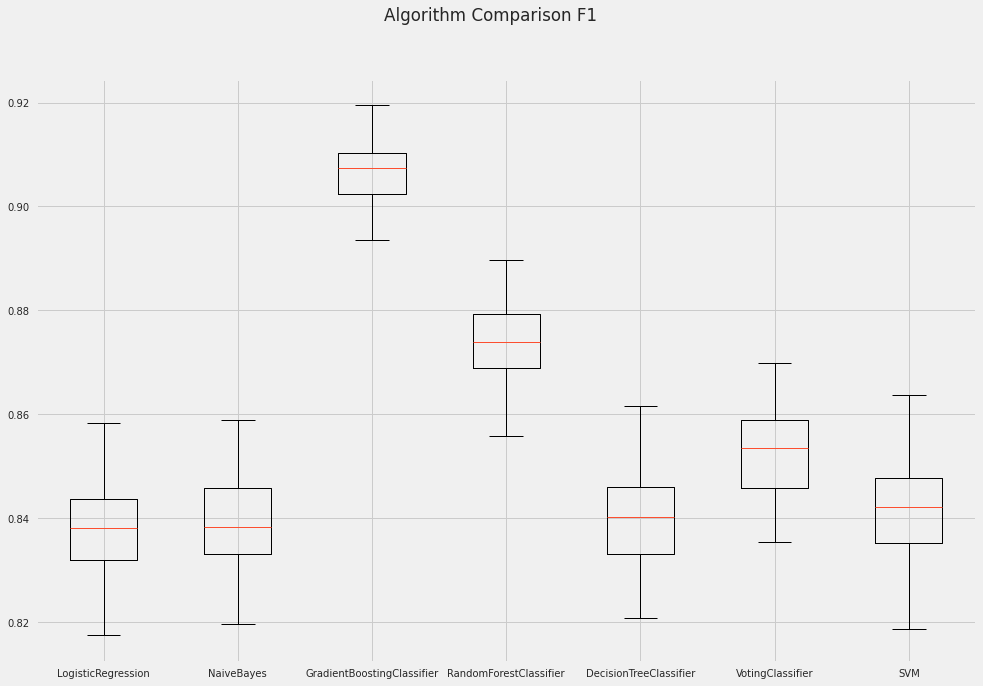

In [22]:
# boxplot algorithm comparison
fig = plt.figure(figsize = (15,10))
fig.suptitle('Algorithm Comparison F1')
ax = fig.add_subplot(111)
plt.boxplot( result_f1_pickle)
ax.set_xticklabels(df.model)
plt.show()
from matplotlib import pyplot as plt

#plt.savefig('AlgorithmComparison_F1',dpi=(250), bbox_inches='tight')
  # save the figure to file
#plt.close(fig) 


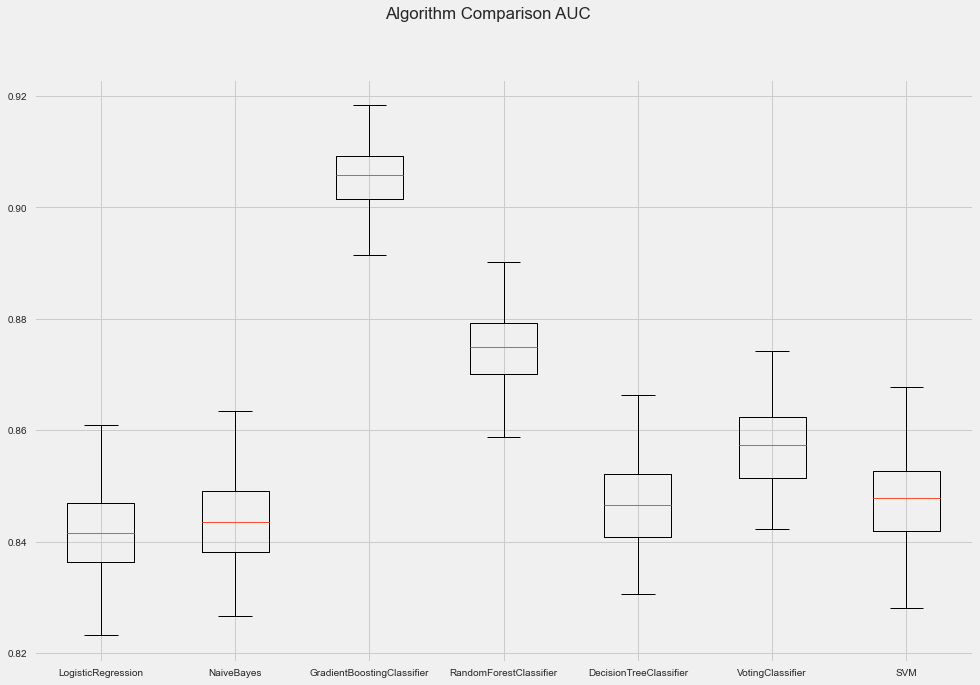

In [15]:
# boxplot algorithm comparison
fig = plt.figure(figsize = (15,10))
fig.suptitle('Algorithm Comparison AUC')
ax = fig.add_subplot(111)
plt.boxplot(result_auc_pickle )
ax.set_xticklabels(df.model)
# save the figure to file
#plt.savefig('AlgorithmComparison_AUC',dpi=(250), bbox_inches='tight')

#plt.close(fig) 
plt.show()

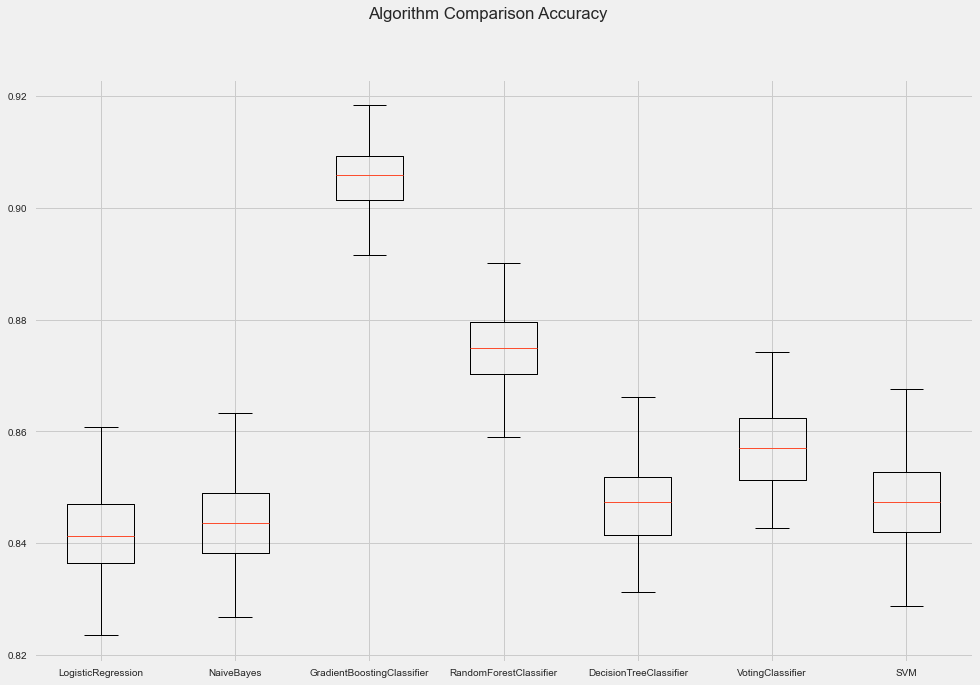

In [16]:

# boxplot algorithm comparison
fig = plt.figure(figsize = (15,10))
fig.suptitle('Algorithm Comparison Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(result_accuracy_pickle )
ax.set_xticklabels(df.model)
# save the figure to file

#plt.savefig('AlgorithmComparison_accuracy',dpi=(250), bbox_inches='tight')
#plt.close(fig) 
plt.show()